In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("abthemedata.csv")
data.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Dark Theme,0.187454,0.084257,0.452341,78,34,New York,1078,No,No
1,Dark Theme,0.245071,0.102095,0.449396,64,24,Texas,1008,No,Yes
2,Light Theme,0.223199,0.118647,0.581251,67,39,Washington,831,No,Yes
3,Dark Theme,0.209866,0.111611,0.449909,66,25,Chicago,592,Yes,Yes
4,Light Theme,0.165602,0.115328,0.454390,73,25,Chicago,1187,Yes,No


In [3]:
data["Theme"].value_counts()

Theme
Dark Theme     502
Light Theme    498
Name: count, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   int64  
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
data.isnull().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

In [6]:
data.describe()

,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Session_Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.199026,0.100351,0.500481,69.865000,29.929000,998.49000
std,0.029214,0.014609,0.058135,5.726392,5.647642,288.85859
min,0.150463,0.075161,0.400002,60.000000,20.000000,500.00000
25%,0.173597,0.087054,0.452270,65.000000,25.000000,742.00000
50%,0.199681,0.100937,0.500123,70.000000,30.000000,1014.50000
75%,0.224432,0.113023,0.551821,75.000000,35.000000,1246.00000
max,0.249972,0.124971,0.599564,79.000000,39.000000,1499.00000


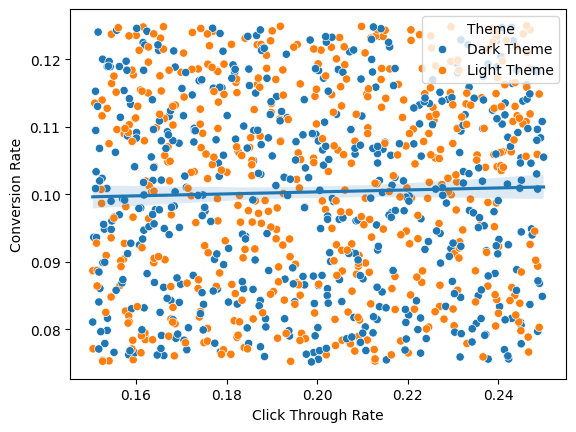

In [7]:
sns.scatterplot(x="Click Through Rate",y="Conversion Rate",data = data,hue="Theme")
sns.regplot(x="Click Through Rate", y="Conversion Rate", data=data, scatter=False)
plt.show()

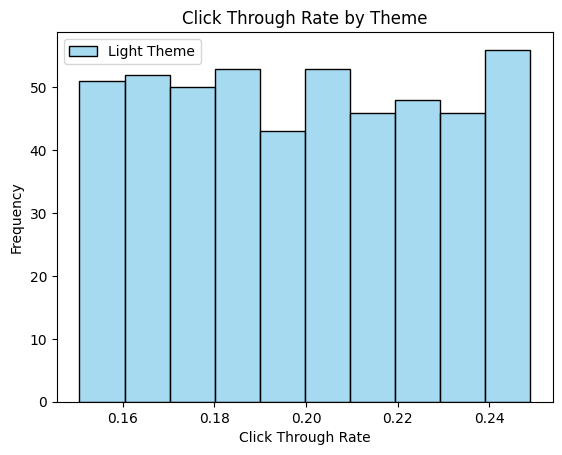

In [8]:
light_theme_data = data[data['Theme'] == 'Light Theme']
sns.histplot(data=light_theme_data, x='Click Through Rate', label='Light Theme', color='skyblue',stat='count')
plt.title('Click Through Rate by Theme')
plt.xlabel('Click Through Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()

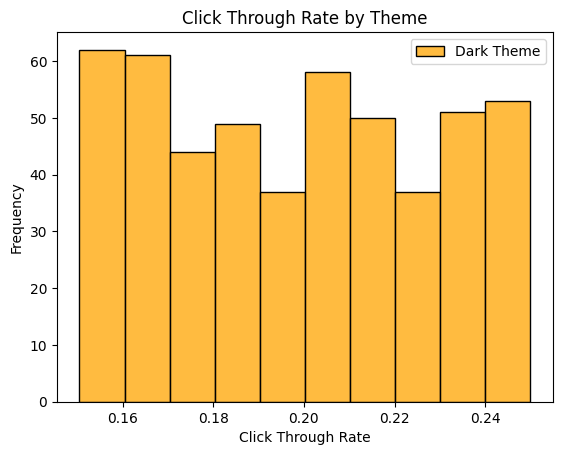

In [9]:
dark_theme_data = data[data['Theme'] == 'Dark Theme']
sns.histplot(data=dark_theme_data, x='Click Through Rate', label='Dark Theme', color='orange', stat='count')
plt.title('Click Through Rate by Theme')
plt.xlabel('Click Through Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()


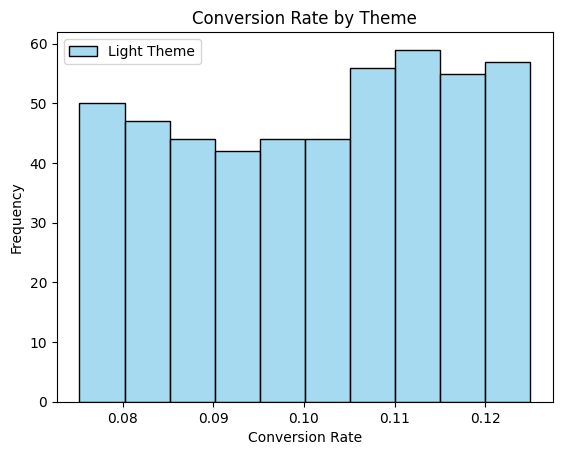

In [10]:
light_theme_data = data[data['Theme'] == 'Light Theme']
sns.histplot(data=light_theme_data,x='Conversion Rate', label='Light Theme', color='skyblue',stat='count')
plt.title('Conversion Rate by Theme')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()

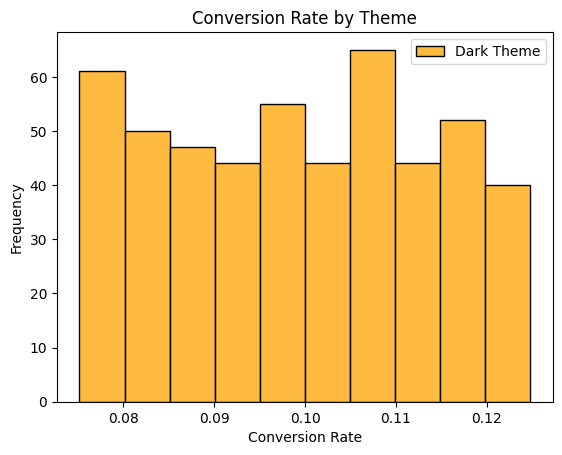

In [11]:
sns.histplot(data=dark_theme_data,x='Conversion Rate', label='Dark Theme', color='orange', stat='count')
plt.title('Conversion Rate by Theme')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\prati\AppData\Local\Temp\ipykernel_14152\1709701907.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Theme",y="Scroll_Depth",data = data,palette=["skyblue","orange"])


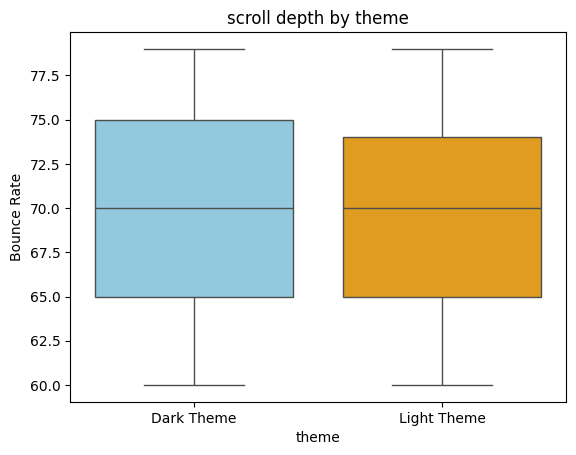

In [12]:
sns.boxplot(x="Theme",y="Scroll_Depth",data = data,palette=["skyblue","orange"])
plt.title("scroll depth by theme")
plt.xlabel("theme")
plt.ylabel("Bounce Rate")
plt.show()

C:\Users\prati\AppData\Local\Temp\ipykernel_14152\1399764314.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Theme', y='Bounce Rate', data=data, palette=['skyblue', 'orange'])


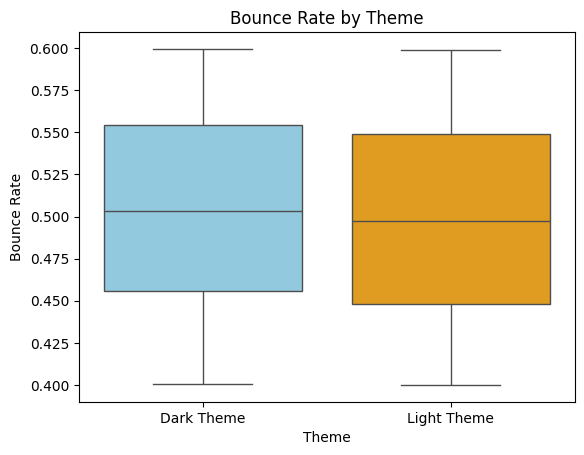

In [13]:
sns.boxplot(x='Theme', y='Bounce Rate', data=data, palette=['skyblue', 'orange'])
plt.title('Bounce Rate by Theme')
plt.xlabel('Theme')
plt.ylabel('Bounce Rate')
plt.show()


In [14]:
# A/B testing for Purchases
light_theme_conversions = light_theme_data[light_theme_data['Purchases'] == 'Yes'].shape[0]
light_theme_total = light_theme_data.shape[0]

dark_theme_conversions = dark_theme_data[dark_theme_data['Purchases'] == 'Yes'].shape[0]
dark_theme_total = dark_theme_data.shape[0]


In [15]:

conversion_counts = [light_theme_conversions, dark_theme_conversions]
sample_sizes = [light_theme_total, dark_theme_total]

light_theme_conversion_rate = light_theme_conversions / light_theme_total
dark_theme_conversion_rate = dark_theme_conversions / dark_theme_total

In [16]:
# Perform two-sample proportion test
from statsmodels.stats.proportion import proportions_ztest 
zstat, pval = proportions_ztest(conversion_counts, sample_sizes)
print("Light Theme Conversion Rate:", light_theme_conversion_rate)
print("Dark Theme Conversion Rate:", dark_theme_conversion_rate)
print("A/B Testing - z-statistic:", zstat, " p-value:", pval)

Light Theme Conversion Rate: 0.29518072289156627
Dark Theme Conversion Rate: 0.3047808764940239
A/B Testing - z-statistic: -0.33123411836787653  p-value: 0.740467650705792


In [17]:
# A/B testing for added to cart
light_theme_conversions2 = light_theme_data[light_theme_data['Added_to_Cart'] == 'Yes'].shape[0]
light_theme_total2 = light_theme_data.shape[0]

dark_theme_conversions2 = dark_theme_data[dark_theme_data['Added_to_Cart'] == 'Yes'].shape[0]
dark_theme_total2 = dark_theme_data.shape[0]

In [19]:

conversion_counts1 = [light_theme_conversions2, dark_theme_conversions2]
sample_sizes1 = [light_theme_total2, dark_theme_total2]

light_theme_conversion_rate1 = light_theme_conversions2 / light_theme_total2
dark_theme_conversion_rate1 = dark_theme_conversions2 / dark_theme_total2

In [20]:
# Perform two-sample proportion test
from statsmodels.stats.proportion import proportions_ztest 
zstat, pval = proportions_ztest(conversion_counts1, sample_sizes1)
print("Light Theme Conversion Rate:", light_theme_conversion_rate1)
print("Dark Theme Conversion Rate:", dark_theme_conversion_rate1)
print("A/B Testing - z-statistic:", zstat, " p-value:", pval)

Light Theme Conversion Rate: 0.4919678714859438
Dark Theme Conversion Rate: 0.4721115537848606
A/B Testing - z-statistic: 0.6283141550519679  p-value: 0.5297981606027662
